# **Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# helping packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**<h1>- Playing with the data &#11088;</h1>**

In [ ]:
# reading train.csv files
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df[['Age', 'Annual Income (k$)']].describe().T[['mean', 'std']]

,mean,std
Age,38.85,13.969007
Annual Income (k$),60.56,26.264721


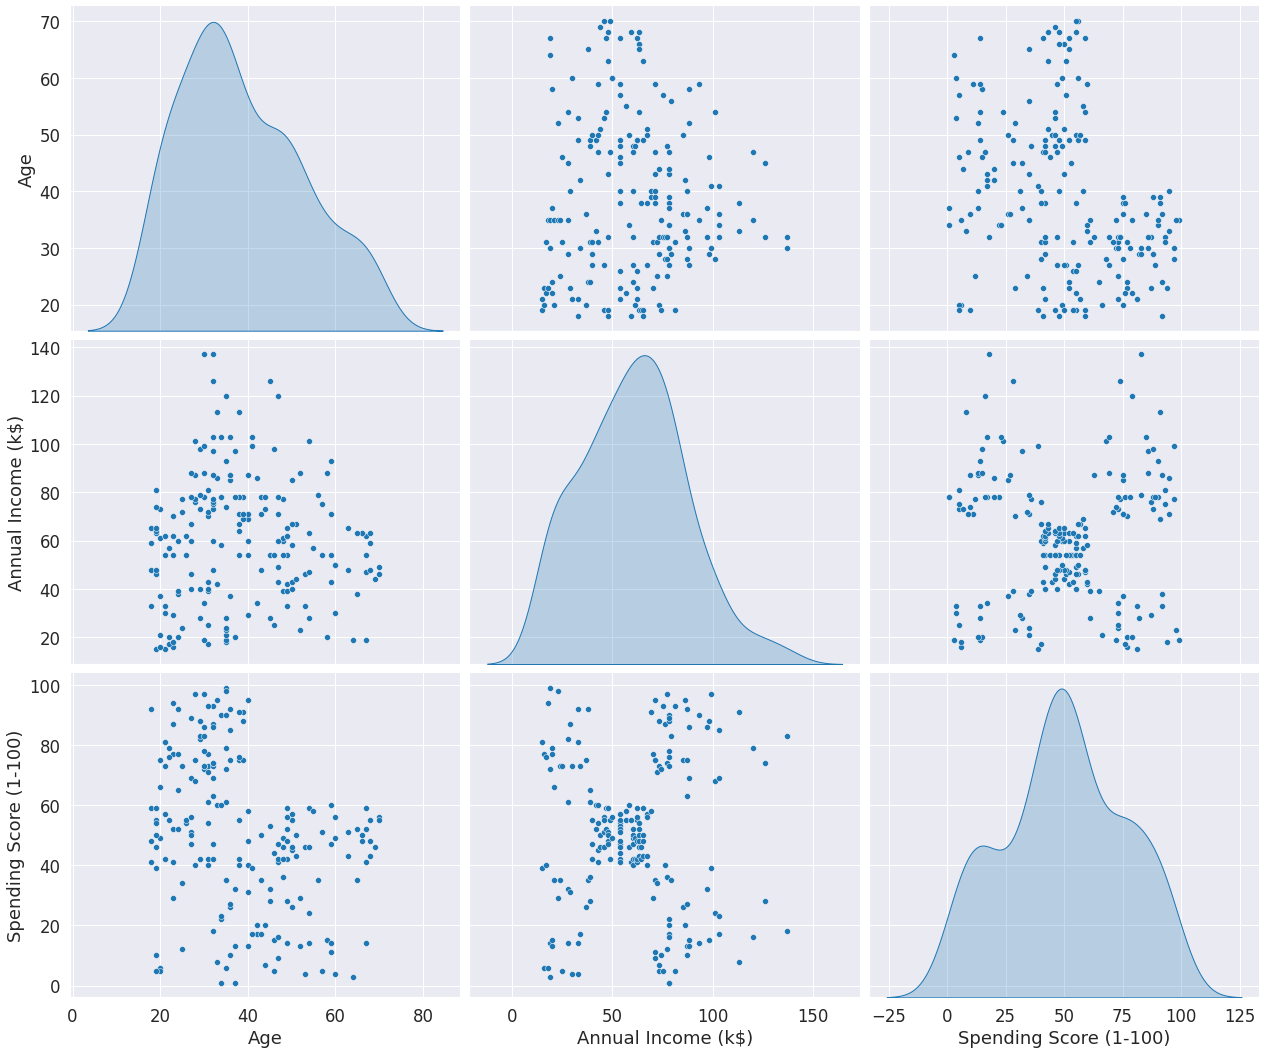

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.pairplot(df[df.columns.difference(["CustomerID"])], diag_kind='kde', height=5, aspect=6/5)

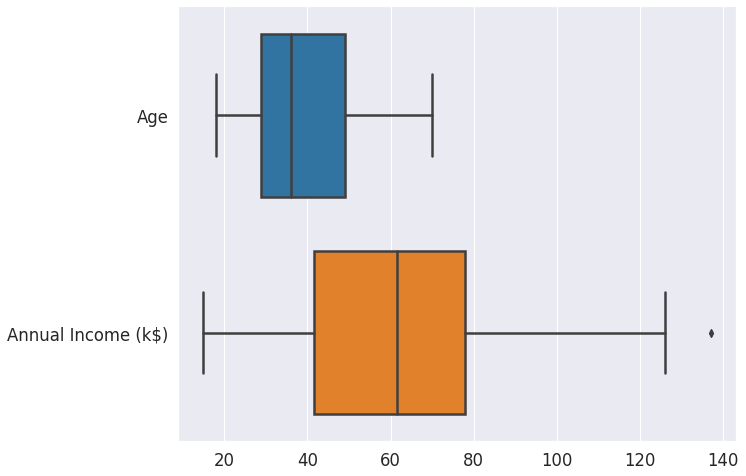

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df[['Age', 'Annual Income (k$)']], width=0.75, orient='h')

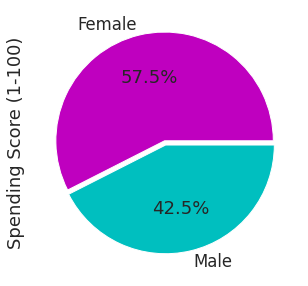

In [ ]:
plt.figure(figsize=(5,5))
_ = df.groupby('Genre')['Spending Score (1-100)'].sum().plot(kind='pie', explode=[0.02]*2, autopct="%.1f%%", colors=['m', 'c'])

In [ ]:
plt.figure(figsize=(5,5))
da = pd.DataFrame(df.groupby('Age')['Spending Score (1-100)'].mean().sort_values(ascending=False)).reset_index()
da.head()

,Age,Spending Score (1-100)
0,39,84.666667
1,30,80.285714
2,29,76.600000
3,24,71.500000
4,22,70.000000


<Figure size 360x360 with 0 Axes>

The age that spends the max average spending level: 39


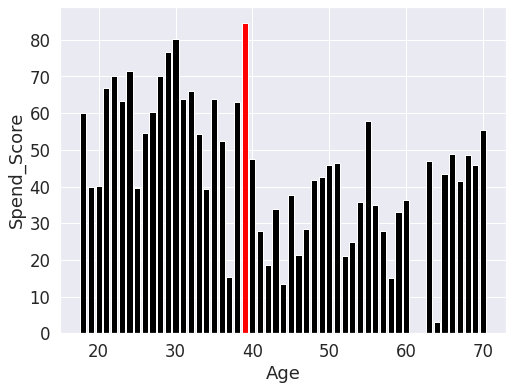

In [ ]:
max = da.iloc[:,0][np.where(da.iloc[:,1].max())[0]][0]
indices = da.iloc[:,0] == max

plt.figure(figsize=(8,6))
_ = plt.bar(da.iloc[:,0][~indices], da.iloc[:,1][~indices], color='k')
_ = plt.bar(da.iloc[:,0][indices], da.iloc[:,1][indices], color='r')
_ = plt.xlabel('Age')
_ = plt.ylabel('Spend_Score')

print("The age that spends the max average spending level:", end=' ')
print(max)

In [ ]:
plt.figure(figsize=(5,5))
di = pd.DataFrame(df.groupby('Annual Income (k$)')['Spending Score (1-100)'].median().sort_values(ascending=False)).reset_index()
di.head()

,Annual Income (k$),Spending Score (1-100)
0,69,74.5
1,99,68.0
2,23,63.5
3,76,63.5
4,38,63.5


<Figure size 360x360 with 0 Axes>

The annual income that spends the max median spending level: 69


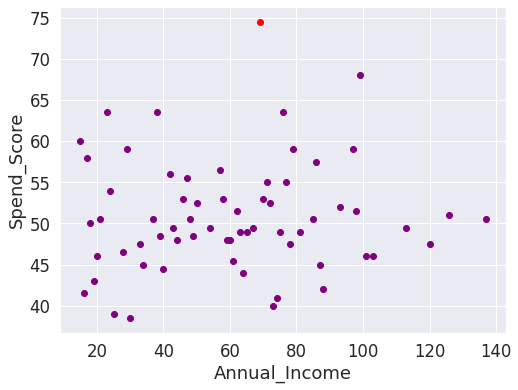

In [ ]:
max = di.iloc[:,0][np.where(di.iloc[:,1].max())[0]][0]
indices = di.iloc[:,0] == max

plt.figure(figsize=(8,6))
_ = plt.scatter(di.iloc[:,0][~indices], di.iloc[:,1][~indices], color = 'purple')
_ = plt.scatter(di.iloc[:,0][indices], di.iloc[:,1][indices], color = 'red')
_ = plt.xlabel('Annual_Income')
_ = plt.ylabel('Spend_Score')

print("The annual income that spends the max median spending level:", end=' ')
print(max)

<hr>

**<h1>- Implementing GD for Multiple Regression &#128185;</h1>**

In [ ]:
def ssr_gradient(x, y, b):
  res = x.dot(b) - y
  return (np.array(res).T*np.array(x.T)).mean(axis=1).reshape(-1,1)


def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
  cost_history = [0] * n_iter
  vector = start
  for itr in range(n_iter):
    diff = -learn_rate * gradient(x, y, vector)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    cost = np.sum(np.square(x.dot(vector) - y))/(2 * len(y))
    cost_history[itr] = cost
  return vector, cost_history


def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [ ]:
# trying to find best coefficients initialization
x1 = df.Age.diff().fillna(df.Age)
x2 = df['Annual Income (k$)'].diff().fillna(df['Annual Income (k$)'])
y_ = df['Spending Score (1-100)'].diff().fillna(df['Spending Score (1-100)'])

print((y_/x1).round(1).value_counts().head())
print((y_/x2).round(1).value_counts().head())

# found -0.2 and 0 or surroundings

-0.2    14
-2.5     5
-3.0     5
 0.3     5
-0.4     5
dtype: int64
 inf    89
-inf    46
-8.0     4
 8.0     3
 9.0     3
dtype: int64


<br>
<hr>
<br>

In [ ]:
x = np.matrix(df[['Age', 'Annual Income (k$)']])
x = np.c_[np.ones(len(x)), x]
y = np.matrix(df['Spending Score (1-100)']).T

# b = np.matrix(np.zeros(x.shape[1])).T # give bad results when initialize with zeros

b = np.matrix([[75], [-0.5], [0.005]])

In [ ]:
trial = gradient_descent(ssr_gradient, x, y, b, 0.0001, 100)

y_pred = trial[0][0,0] + trial[0][1,0] * df['Age'] + trial[0][2,0] * df['Annual Income (k$)']
cost = trial[1]

print("Coefficients:\n", trial[0])

Coefficients:
 [[ 7.49970025e+01]
 [-6.25029839e-01]
 [-6.41134012e-03]]


In [ ]:
R2 = R2_score(df['Spending Score (1-100)'], y_pred)

print("Score:", R2)

Score: 0.10681803439301818


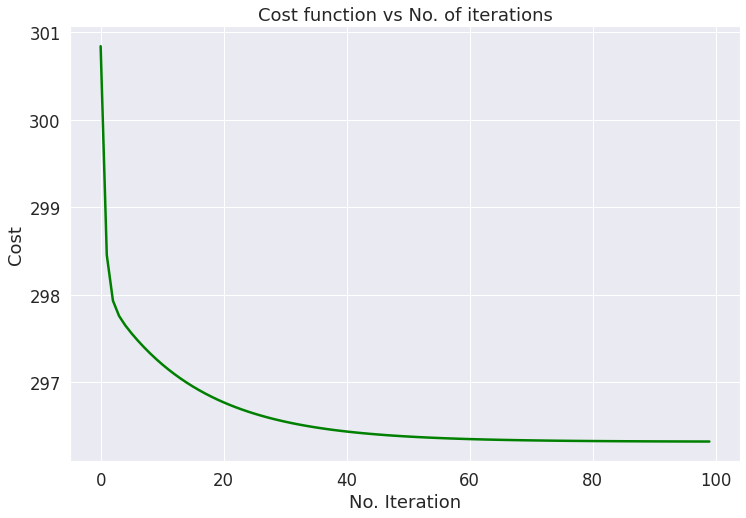

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(len(cost)), cost, color='green')
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

**<h1>Decreasing the value of α &#128317;</h1>**

In [ ]:
x = np.matrix(df[['Age', 'Annual Income (k$)']])
x = np.c_[np.ones(len(x)), x]
y = np.matrix(df['Spending Score (1-100)']).T

b = np.matrix([[75], [-0.5], [0.005]])

In [ ]:
trial = gradient_descent(ssr_gradient, x, y, b, 0.00001, 500)

y_pred = trial[0][0,0] + trial[0][1,0] * df['Age'] + trial[0][2,0] * df['Annual Income (k$)']
cost = trial[1]

print("Coefficients:\n", trial[0])

Coefficients:
 [[ 7.49977288e+01]
 [-6.10852363e-01]
 [-1.47003849e-02]]


In [ ]:
R2 = R2_score(df['Spending Score (1-100)'], y_pred)

print("Score:", R2)

Score: 0.10662333646584965


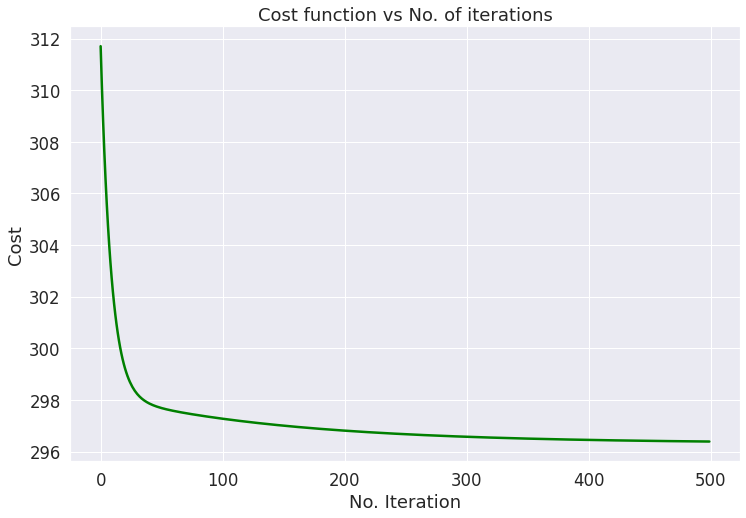

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(len(cost)), cost, color='green')
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

<hr>

**<h1>Increasing the value of α &#128316;</h1>**

In [ ]:
x = np.matrix(df[['Age', 'Annual Income (k$)']])
x = np.c_[np.ones(len(x)), x]
y = np.matrix(df['Spending Score (1-100)']).T

b = np.matrix([[75], [-0.5], [0.005]])

In [ ]:
trial = gradient_descent(ssr_gradient, x, y, b, 0.0003, 10)

y_pred = trial[0][0,0] + trial[0][1,0] * df['Age'] + trial[0][2,0] * df['Annual Income (k$)']
cost = trial[1]

print("Coefficients:\n", trial[0])

Coefficients:
 [[ 7.49981471e+01]
 [-5.94849793e-01]
 [-2.09843644e-02]]


In [ ]:
R2 = R2_score(df['Spending Score (1-100)'], y_pred)

print("Score:", R2)

Score: 0.10607719141643701


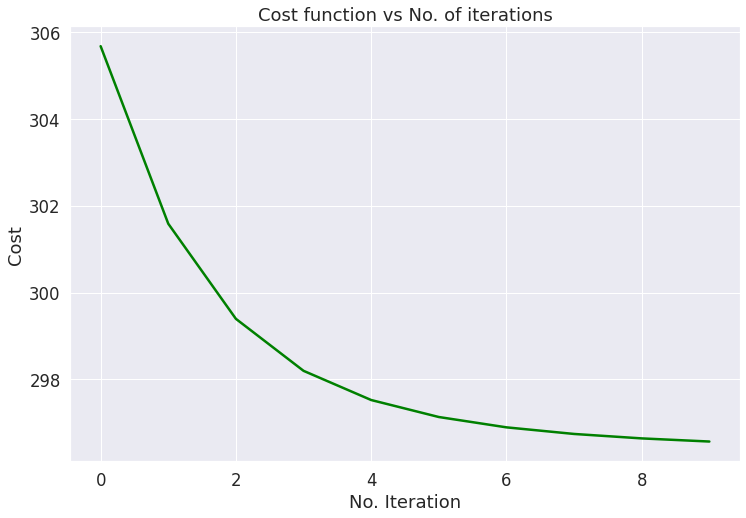

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(len(cost)), cost, color='green')
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

**<h1>Conclusion &#128373;</h1>**

> The hyperparameter alpha **α** is affecting the GD Algorithm while getting weight values of predictors and it's obvious from the figures above that it took **less iterations** to reach minimum cost in case of **increasing** the learning rate **α** and **more iterations** in the other case of **decreasing** alpha **α**.

<hr>

**<h1>- Implementing the deterministic normal equation &#128221;</h1>**

In [ ]:
b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

print("Coefficients:\n", b)

Coefficients:
 [[ 7.33478522e+01]
 [-6.04787258e-01]
 [ 5.74855922e-03]]


In [ ]:
y_act = df['Spending Score (1-100)']
y_pred = np.array(x.dot(b)).ravel()

print("Score:", R2_score(y_act, y_pred))

Score: 0.10711158828485168


> ## Close results of coefficients to **GD** and the same R2 score in simple steps.

<br>
<hr>
<br>

**<h1>- Implementing the sklearn solution &#129504;</h1>**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

# predict test values
y_pred = regressor.predict(x)

In [ ]:
print("Intercept:", regressor.intercept_[0])
print("Coefficients:", regressor.coef_[0][1:])

Intercept: 73.347852221864
Coefficients: [-0.60478726  0.00574856]


In [ ]:
print("Score:", regressor.score(x,y))


Score: 0.10711158828485168


> ## Different results of coefficients compared with **GD** but the same R2 with both of solutions above using direct steps from sklearn library.

<hr>

**<h1>- Predicting with the three models &#129302;</h1>**

# **1) GD**

In [ ]:
x = np.matrix(df[['Age', 'Annual Income (k$)']])
x = np.c_[np.ones(len(x)), x]
y = np.matrix(df['Spending Score (1-100)']).T

b = np.matrix([[75], [-0.5], [0.005]])

In [ ]:
trial = gradient_descent(ssr_gradient, x, y, b, 0.0001, 100)

#        trial[0][0,0] + trial[0][1,0] * df['Age'] + trial[0][2,0] * df['Annual Income (k$)']
y_pred = trial[0][0,0] + trial[0][1,0] * 35 + trial[0][2,0] * 44

print("Predict:", y_pred)

Predict: 52.838859148725206


# **2) Deterministic Normal Eq.**

In [ ]:
b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
x_p = np.matrix([1, 35, 44])
y_pred = np.array(x_p.dot(b)).ravel()

print("Predict:", y_pred[0])

Predict: 52.43323480207317


# **3) Sklearn**

In [ ]:
model = LinearRegression()
model.fit(x, y)

x_p = np.matrix([1, 35, 44])
y_pred = model.predict(x_p)

print("Predict:", y_pred[0,0])

Predict: 52.43323480207329


<hr>

<hr>